In [1]:
from SAV import Sequential_AdaptVQE
from openfermion.chem import MolecularData
from openfermionpyscf import run_pyscf
from mindquantum.algorithm.nisq import get_qubit_hamiltonian,Transform
from mindquantum.core.operators import Hamiltonian

/workspaces/Sequential-ADAPT-VQE/.conda/lib/python3.9/site-packages/mindquantum/simulator/__init__.py:17: UserWarning: Disable mqvector gpu backend due to: Malloc GPU memory failed: cudaErrorInsufficientDriver, CUDA driver version is insufficient for CUDA runtime version
  from .available_simulator import SUPPORTED_SIMULATOR


In [2]:
dist = 1.0
geometry = [
    ["H", [0.0, 0.0, 0.0 * dist]],
    ["H", [0.0, 0.0, 1.0 * dist]],
    # ["H", [0.0, 0.0, 2.0 * dist]],
    # ["H", [0.0, 0.0, 3.0 * dist]],
]
basis = "sto3g"
spin = 0
molecule = MolecularData(
    geometry,
    basis,
    multiplicity=2 * spin + 1
)
molecule_of = run_pyscf(
    molecule,
    run_scf=1,
    run_ccsd=1,
    run_fci=1
)
        
QHamiltonian = get_qubit_hamiltonian(molecule_of)
molecule_of.fci_energy      

-1.1011503302326187

In [17]:
SAV = Sequential_AdaptVQE(hamiltonian=QHamiltonian,Layer=1,iteration=3)

logger初始化完毕!
初始化无报错，开始进行......


In [18]:
SAV.run()

===================当前进行第1轮计算====================
当前处理第0个qubit
最优的index为：1,因此选定的gate为：RY
----------------------------------
当前处理第1个qubit
最优的index为：2,因此选定的gate为：RZ
----------------------------------
当前处理第2个qubit
最优的index为：1,因此选定的gate为：RY
----------------------------------
当前处理第3个qubit
最优的index为：1,因此选定的gate为：RY
----------------------------------
添加EHA块,Layer=1...
第1轮的计算结果为:-0.7458717929045843,目前参数量为：30
===================当前进行第2轮计算====================
当前处理第0个qubit
最优的index为：2,因此选定的gate为：RZ
----------------------------------
当前处理第1个qubit
最优的index为：2,因此选定的gate为：RZ
----------------------------------
当前处理第2个qubit
最优的index为：0,因此选定的gate为：RX
----------------------------------
当前处理第3个qubit
最优的index为：0,因此选定的gate为：RX
----------------------------------
添加EHA块,Layer=1...
第2轮的计算结果为:-1.066108648772171,目前参数量为：60
===================当前进行第3轮计算====================
当前处理第0个qubit
最优的index为：1,因此选定的gate为：RY
----------------------------------
当前处理第1个qubit
最优的index为：0,因此选定的gate为：RX
---------------------------------

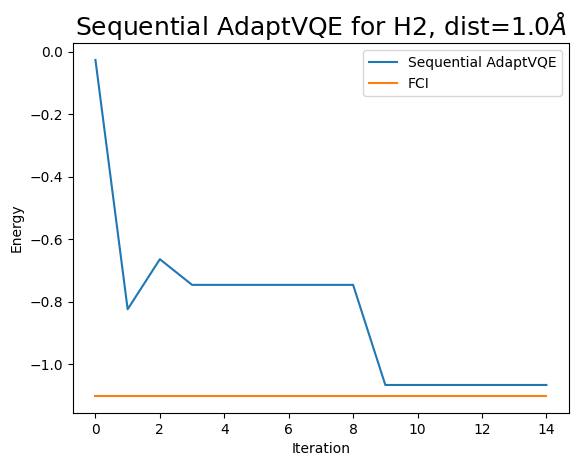

In [23]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure()
plt.plot(range(len(SAV.vqe_history)),SAV.vqe_history)
plt.plot(range(len(SAV.vqe_history)),len(SAV.vqe_history)*[molecule_of.fci_energy])
plt.title('Sequential AdaptVQE for H2, dist=1.0$\AA$',fontsize=18)
plt.xlabel('Iteration')
plt.ylabel('Energy')
plt.legend(['Sequential AdaptVQE', 'FCI'])


In [11]:
SAV.vqe_history

[-0.026244878982980613,
 -0.8238878091154381,
 -1.0661086491148064,
 -1.0661086492774057,
 -0.7458717930243629,
 -0.7458717925768235,
 -0.7458717929802137,
 -1.0661086491311915,
 -1.0661086493055105,
 -0.745871139379481,
 -0.7458710740144947,
 -0.7458714260306251,
 -0.7458716672493391,
 -0.7458717908578936,
 -1.1011503301957148,
 -1.101150264046952,
 -0.7458717929886731,
 -0.7458717565212303,
 -0.7458716503458642,
 -1.1011503097440674,
 -1.1011503070008575,
 -1.1011503199574841,
 -1.1011503100919928,
 -1.101150063954246,
 -0.7458716653992165,
 -0.7458713874490651,
 -0.7458717197887963,
 -0.7458717624059148,
 -0.7458717651864597,
 -1.1011503202919721,
 -1.101149956779657,
 -1.10115009852697,
 -1.101150088753572,
 -1.101149832462295,
 -1.1011503007294452]

In [20]:
SAV.current_ansatz.summary()        

                                       Circuit Summary                                       
╭──────────────────────┬────────────────────────────────────────────────────────────────────╮
│ Info                 │ value                                                              │
├──────────────────────┼────────────────────────────────────────────────────────────────────┤
│ Number of qubit      │ 4                                                                  │
├──────────────────────┼────────────────────────────────────────────────────────────────────┤
│ Total number of gate │ 270                                                                │
│ Barrier              │ 0                                                                  │
│ Noise Channel        │ 0                                                                  │
│ Measurement          │ 0                                                                  │
├──────────────────────┼────────────────────────────────────────────────────────────────────┤
│ Parameter gate       │ 90                                                                 │
│ 90 ansatz parameters │ p_000, p_001, p_002, p_003, p_004, p_005, p_006, p_007, p_008,     │
│                      │ p_009...                                                           │
╰──────────────────────┴────────────────────────────────────────────────────────────────────╯